In [1]:
import pandas as pd

In [2]:
taxi = pd.read_table("E:\\Capstone Project\\Data\\Taxi\\taxi.txt",sep = ',',thousands=',')

In [3]:
beforepick = taxi[['OBJECTID_1','location_i','beforepickup_csv_Field3','taxi_density','taxi_commercial','road_density']]
beforedrop = taxi[['OBJECTID_1','location_i','beforedropoff_csv_Field3','taxi_density','taxi_commercial','road_density']]
afterpick = taxi[['OBJECTID_1','location_i','afterpickup_csv_Field3','taxi_density','taxi_commercial','road_density']]
afterdrop = taxi[['OBJECTID_1','location_i','Field3','taxi_density','taxi_commercial','road_density']]

In [4]:
beforepick = beforepick.rename(columns={'beforepickup_csv_Field3':'taxi_number'})
beforedrop = beforedrop.rename(columns={'beforedropoff_csv_Field3':'taxi_number'})
afterpick = afterpick.rename(columns={'afterpickup_csv_Field3':'taxi_number'})
afterdrop = afterdrop.rename(columns={'Field3':'taxi_number'})

In [5]:
beforepick = beforepick.drop( index = beforepick.taxi_number[beforepick.taxi_number == 0].index )
beforedrop = beforedrop.drop( index = beforedrop.taxi_number[beforedrop.taxi_number == 0].index )
afterpick = afterpick.drop( index = afterpick.taxi_number[afterpick.taxi_number == 0].index )
afterdrop = afterdrop.drop( index = afterdrop.taxi_number[afterdrop.taxi_number == 0].index )

In [6]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

scaler.fit(beforepick[['taxi_density','taxi_commercial','road_density']])
beforepick[['taxi_density','taxi_commercial','road_density']] = scaler.transform(beforepick[['taxi_density','taxi_commercial','road_density']])

scaler.fit(beforedrop[['taxi_density','taxi_commercial','road_density']])
beforedrop[['taxi_density','taxi_commercial','road_density']] = scaler.transform(beforedrop[['taxi_density','taxi_commercial','road_density']])

scaler.fit(afterpick[['taxi_density','taxi_commercial','road_density']])
afterpick[['taxi_density','taxi_commercial','road_density']] = scaler.transform(afterpick[['taxi_density','taxi_commercial','road_density']])

scaler.fit(afterdrop[['taxi_density','taxi_commercial','road_density']])
afterdrop[['taxi_density','taxi_commercial','road_density']] = scaler.transform(afterdrop[['taxi_density','taxi_commercial','road_density']])

In [9]:
import numpy as np
beforepick[['taxi_number']] = np.log(beforepick[['taxi_number']])
beforedrop[['taxi_number']] = np.log(beforepick[['taxi_number']])
afterpick[['taxi_number']] = np.log(beforepick[['taxi_number']])
afterdrop[['taxi_number']] = np.log(beforepick[['taxi_number']])

No handles with labels found to put in legend.


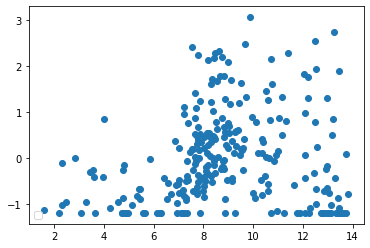

In [10]:
import matplotlib.pyplot as plt

import matplotlib as mpl

fig,ax=plt.subplots(); 
ax.scatter(beforepick.taxi_number,beforepick.taxi_commercial)#ppt
#ax.plot(data.time,data.occupancy*35,c='b')#为了显示效果，将占有率放大35倍
#ax.set_xticks(range(1,21,2),minor=False);#设置刻度
ax.legend(loc='lower left')

In [14]:
import statsmodels.formula.api as smf

model = smf.ols('taxi_number~taxi_density+taxi_commercial+road_density', afterdrop).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            taxi_number   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     7.169
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           0.000122
Time:                        16:36:09   Log-Likelihood:                -2777.0
No. Observations:                 259   AIC:                             5562.
Df Residuals:                     255   BIC:                             5576.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6584.2819    687.182      9.582      0.000    5231.008    7937.556
taxi_density     1141.2437    703.314      1.623      0.106    -243.801    2526.288
taxi_commercial   360.8722    747.822      0.483      0.630   -1111.821    1833.565
road_density     2708.0517    748.913      3.616      0.000    1233.210    4182.894
==============================================================================
Omnibus:                      146.477   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              668.598
Skew:                           2.440   Prob(JB):                    6.54e-146
Kurtosis:                       9.176   Cond. No.                         1.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#beforepick.to_csv(r'E:\\Capstone Project\\Data\\Taxi\\beforepick.csv',index=False,sep=',')